**Importing Libraries**

In [133]:
from apyori import apriori
import pandas as pd

**Reading and printing the CSV**

In [134]:
MAX_RULES = 8

dataframe = pd.read_csv('pizzaria.csv', sep = ';')
dataframe.head()

,dia,horario,tipo_de_encomenda,possui borda,refrigerante,valor,tempo_de_espera
0,sexta,inicio,buscar,nao,nao,30-34,22-33
1,sexta,inicio,buscar,nao,nao,30-34,33-44
2,sexta,inicio,buscar,nao,nao,26-30,33-44
3,sexta,inicio,buscar,nao,nao,30-34,33-44
4,sexta,inicio,buscar,nao,nao,30-34,22-33


**Visualizing the data**

<AxesSubplot: xlabel='tempo_de_espera', ylabel='count'>

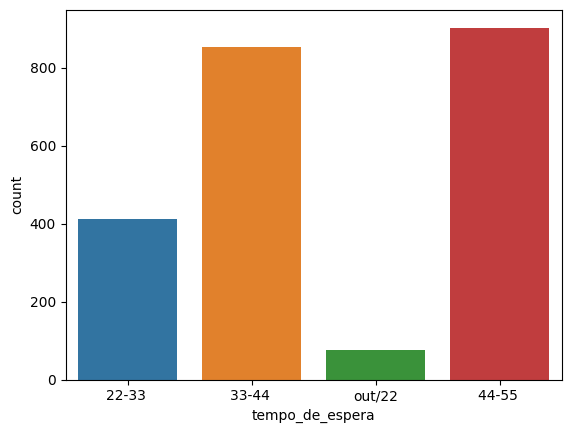

In [135]:
import seaborn as sns
sns.countplot(x = dataframe['tempo_de_espera'])

**Substituindo valor no formato de data**

<AxesSubplot: xlabel='tempo_de_espera', ylabel='count'>

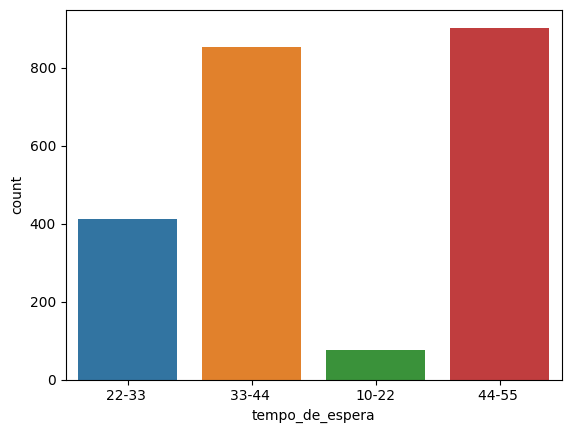

In [136]:
import numpy as np
dataframe.replace('out/22', '10-22', inplace = True) # inplace = True também altera na base, não só na memória
sns.countplot(x = dataframe['tempo_de_espera'])

**Colocando os valores num vetor de segunda dimensão - cada instância armazenada numa posição do vetor**

In [137]:
transactions = []

for t in dataframe.values:
    transactions.append([str(item) for item in t])
    
transactions

[['sexta', 'inicio', 'buscar', 'nao', 'nao', ' 30-34', '22-33 '],
 ['sexta', 'inicio', 'buscar', 'nao', 'nao', ' 30-34', '33-44 '],
 ['sexta', 'inicio', 'buscar', 'nao', 'nao', ' 26-30', '33-44 '],
 ['sexta', 'inicio', 'buscar', 'nao', 'nao', ' 30-34', '33-44 '],
 ['sexta', 'inicio', 'buscar', 'nao', 'nao', ' 30-34', '22-33 '],
 ['sexta', 'inicio', 'entregar', 'nao', 'sim', ' 30-34', '33-44 '],
 ['sexta', 'inicio', 'buscar', 'sim', 'nao', ' 30-34', '10-22'],
 ['sexta', 'pico', 'entregar', 'nao', 'sim', ' 34-38', '22-33 '],
 ['sexta', 'pico', 'buscar', 'nao', 'nao', ' 22-26', '33-44 '],
 ['sexta', 'pico', 'entregar', 'nao', 'nao', ' 22-26', '44-55 '],
 ['sexta', 'pico', 'buscar', 'nao', 'nao', ' 18-22', '33-44 '],
 ['sexta', 'pico', 'entregar', 'nao', 'nao', ' 22-26', '44-55 '],
 ['sexta', 'pico', 'entregar', 'nao', 'nao', ' 18-22', '44-55 '],
 ['sexta', 'pico', 'entregar', 'nao', 'nao', ' 34-38', '10-22'],
 ['sexta', 'pico', 'entregar', 'nao', 'nao', ' 14-18', '44-55 '],
 ['sexta', 'pi

**Cada 'RelationRecord' ou 'frozenset' é uma regra**

In [138]:
# Dessa forma, não mostra um valor se relacionando com ele mesmo
apriori = apriori(transactions, min_support=0.032, min_confidence=0.2, min_lift=1.5, min_length=2, use_colnames=True)
regras = list(apriori)
regras


[RelationRecord(items=frozenset({' 34-38', 'sim'}), support=0.0784313725490196, ordered_statistics=[OrderedStatistic(items_base=frozenset({' 34-38'}), items_add=frozenset({'sim'}), confidence=0.4559585492227979, lift=1.598704663212435), OrderedStatistic(items_base=frozenset({'sim'}), items_add=frozenset({' 34-38'}), confidence=0.27499999999999997, lift=1.5987046632124349)]),
 RelationRecord(items=frozenset({'sim', ' 38-42'}), support=0.045454545454545456, ordered_statistics=[OrderedStatistic(items_base=frozenset({' 38-42'}), items_add=frozenset({'sim'}), confidence=0.6891891891891893, lift=2.4164695945945946)]),
 RelationRecord(items=frozenset({'22-33 ', 'fim'}), support=0.05124777183600713, ordered_statistics=[OrderedStatistic(items_base=frozenset({'22-33 '}), items_add=frozenset({'fim'}), confidence=0.279126213592233, lift=1.5277054226852949), OrderedStatistic(items_base=frozenset({'fim'}), items_add=frozenset({'22-33 '}), confidence=0.28048780487804875, lift=1.5277054226852946)]),
 

**Total de regras**

In [139]:
resultados = [list(x) for x in regras]
numeroderegras = (len(resultados))
numeroderegras

15

**Visualizando as regras(relações) de forma mais fácil**

In [140]:
resultadoFormatado = []

for i in range(0, numeroderegras):
    resultadoFormatado.append([list(x) for x in resultados[i][2]])

for rf in resultadoFormatado:
    print(rf) # imprimindo cada regra em uma linha

[[frozenset({' 34-38'}), frozenset({'sim'}), 0.4559585492227979, 1.598704663212435], [frozenset({'sim'}), frozenset({' 34-38'}), 0.27499999999999997, 1.5987046632124349]]
[[frozenset({' 38-42'}), frozenset({'sim'}), 0.6891891891891893, 2.4164695945945946]]
[[frozenset({'22-33 '}), frozenset({'fim'}), 0.279126213592233, 1.5277054226852949], [frozenset({'fim'}), frozenset({'22-33 '}), 0.28048780487804875, 1.5277054226852946]]
[[frozenset({'44-55 ', 'sim'}), frozenset({' 34-38'}), 0.2779783393501805, 1.616019154149754]]
[[frozenset({' 34-38'}), frozenset({'entregar', 'sim'}), 0.3134715025906736, 1.79905384095517], [frozenset({' 34-38', 'entregar'}), frozenset({'sim'}), 0.4548872180451128, 1.5949483082706766], [frozenset({'entregar', 'sim'}), frozenset({' 34-38'}), 0.309462915601023, 1.79905384095517]]
[[frozenset({' 34-38'}), frozenset({'nao', 'sim'}), 0.4404145077720207, 1.6444095764399573], [frozenset({'sim'}), frozenset({'nao', ' 34-38'}), 0.265625, 1.5685855263157895], [frozenset({'na

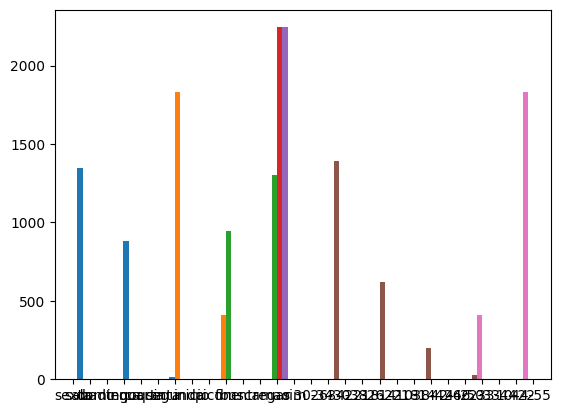

In [141]:
import matplotlib.pyplot as plt

histValorTotal = plt.hist(dataframe)